## Install all requirements make sure to run in an python env

In [1]:
!pip install -r req.txt

## Imports

In [2]:
from paddleocr import PaddleOCR, draw_ocr # For OCR processing
from groq import Groq  # For calling Groq LLaMA 3.3 API
import os  # For accessing environment variables like GROQ_API_KEY
from PIL import Image
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
# Load environment variables from .env file
load_dotenv()

True

## Run this Once

Downloads the OCR model

In [3]:
# Initialize the OCR model
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Initialize with angle classification and English language

[2024/12/09 19:13:30] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\nitpo/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\nitpo/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None,

# Set up path to input files

### here samples are used...
### Then OCR is done

In [4]:
# Path to the input image
img_path = 'images_sample\image.png'

# Perform OCR
results = ocr.ocr(img_path, cls=True)

# Print the recognized text along with confidence scores
print("Recognized Text with Confidence Scores:")
for idx, res in enumerate(results[0]):
    text, confidence = res[1]
    print(f"{idx + 1}. {text} (Confidence: {confidence:.2f})")

[2024/12/09 19:14:50] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.32535600662231445
[2024/12/09 19:14:50] ppocr DEBUG: cls num  : 13, elapsed : 0.12993741035461426
[2024/12/09 19:14:51] ppocr DEBUG: rec_res num  : 13, elapsed : 1.6117053031921387
Recognized Text with Confidence Scores:
1. tGuideine Daly Amount 2000kcal dt (Confidence: 0.83)
2. Lay's is the Registered Trade Mark of PepsiCo,Inc (Confidence: 0.90)
3. INGREDENTS:Potato.Edble Vegetable OlPalmolein O (Confidence: 0.86)
4. Rioe Bran O.Spices &Condments Onion Powder,Ch (Confidence: 0.87)
5. Powder.Dried Mango Powder.Coriander Seed Powder (Confidence: 0.90)
6. Ginger PowderGaric Powder.BlackPepper Powder. (Confidence: 0.86)
7. Spices Extract.Turmeric Powder.lodisedSaltBlackSalt (Confidence: 0.84)
8. Sugar.Tomato Powder.Citric Acid 330 (Confidence: 0.87)
9. CONTAINS ADDEDFLAVOUR (NATURAL&NATURE (Confidence: 0.96)
10. IDENTICAL FLAVOURING SUBSTANCES) (Confidence: 0.95)
11. Used as natural favouring agent (Confidence: 0.91)
12. PO

## Drawing OCR results on image

In [5]:
# Draw OCR results on the image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in results[0]]
txts = [line[1][0] for line in results[0]]
scores = [line[1][1] for line in results[0]]

# Path to font file (adjust path to your environment)
font_path = "\\font\\arial.ttf"

# Generate annotated image
annotated_image = draw_ocr(image, boxes, txts, scores, font_path=font_path)

# Convert and save/display the result
annotated_image = Image.fromarray(annotated_image)
annotated_image.save('result.jpg')

## Annotation and getting a op.txt

[2024/12/09 19:16:17] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.04289054870605469
[2024/12/09 19:16:17] ppocr DEBUG: cls num  : 13, elapsed : 0.037645816802978516
[2024/12/09 19:16:18] ppocr DEBUG: rec_res num  : 13, elapsed : 0.9284629821777344
Recognized text has been saved to op.txt


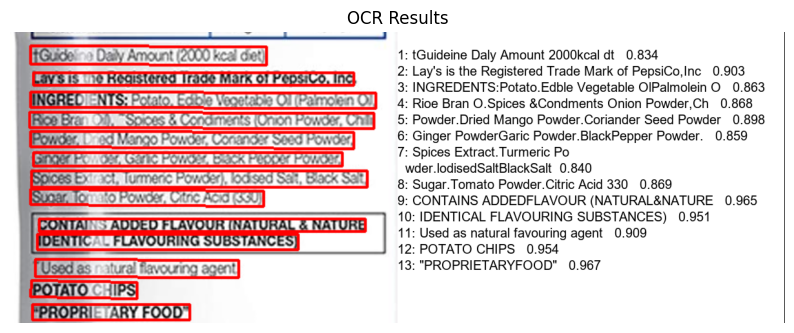

In [6]:
# Perform OCR
results = ocr.ocr(img_path, cls=True)

# Extract the recognized text
recognized_text = [res[1][0] for res in results[0]]

# Save the text to a file
output_file = 'op.txt'
with open(output_file, 'w', encoding='utf-8') as f:
    for line in recognized_text:
        f.write(line + '\n')

print(f"Recognized text has been saved to {output_file}")

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis('off')
plt.title("OCR Results")
plt.show()

## Now to the LLM section : Here Llama 3.3 is used

### Initialize Groq 
Make sure to set up ```.env``` as per ```.env.example``` and get your ```api_keys``` from groq console

In [7]:
# Initialize Groq client
client = Groq(
    api_key=os.getenv("GROQ_API_KEY"),  # Fetch the key from environment variables
)

### Setting up prompts

In [8]:
# user_prompt = input("Enter your question or prompt: ")
user_prompt = "Can you tell all the benifits and potential health risks of the ingredients without bias"
final_prompt = f"{recognized_text}\n\n{user_prompt}"

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": final_prompt,
        }
    ],
    model="llama-3.3-70b-specdec",
)

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


### Retriving and printing the results also saving a copy

In [ ]:
# Retrieve and display the response
groq_response = chat_completion.choices[0].message.content
print("Response from Groq LLaMA 3.3:")
print(groq_response)

with open('groq_response.txt', 'w', encoding='utf-8') as f:
    f.write(groq_response)

Response from Groq LLaMA 3.3:
I'll provide an unbiased analysis of the ingredients listed, highlighting their potential benefits and health risks. Keep in mind that individual tolerance and sensitivity may vary.

1. **Potato**:
	* Benefits: Rich in fiber, potassium, and antioxidants. Potatoes are a good source of energy and can help lower blood pressure.
	* Risks: High glycemic index, which can cause a spike in blood sugar levels. Excessive consumption may lead to weight gain and increased risk of chronic diseases like diabetes and heart disease.
2. **Edible Vegetable Oil (Palmolein)**:
	* Benefits: Rich in vitamin E and antioxidants. Palmolein oil has a high smoke point, making it suitable for frying.
	* Risks: High in saturated fats, which can increase cholesterol levels and contribute to heart disease. Palm oil production has also been linked to deforestation and environmental concerns.
3. **Rice Bran Oil**:
	* Benefits: Rich in heart-healthy unsaturated fats, antioxidants, and vita